In [3]:
#Загружаем наш дата сет. Мы имеем дата сет из 10 колонок (Age, Sex, ALP, ALT, AST, BIL, CHE, CHOL, CREA, Category) и 615 строк. Есть как числовые, так и качественные переменные. Крайний столбец Category выступает как классификатор.

In [1]:
# Загружаем необходимые библиотеки для начала работы (Numpy, Matplotlib.pyplot ,Pandas)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Загружаем дата сет в формате сsv, разделитель запятые.
df = pd.read_csv('controlwork3.csv', sep=',')

In [3]:
# Проверяем как загрузился дата сет. Сразу видно присутствие NaN в столбцах
df

,Age,Sex,ALP,ALT,AST,BIL,CHE,CHOL,CREA,Category
0,32,m,52.5,7.7,22.1,7.5,6.93,3.23,106.0,0
1,32,m,70.3,18.0,24.7,3.9,11.17,4.80,74.0,0
2,32,m,74.7,36.2,52.6,6.1,8.84,5.20,86.0,0
3,32,m,52.0,30.6,22.6,18.9,7.33,4.74,80.0,0
4,32,m,74.1,32.6,24.8,9.6,9.15,4.32,76.0,0
...,...,...,...,...,...,...,...,...,...,...
610,62,f,416.6,5.9,110.3,50.0,5.57,6.30,55.7,1
611,64,f,102.8,2.9,44.4,20.0,1.54,3.02,63.0,1
612,64,f,87.3,3.5,99.0,48.0,1.66,3.63,66.7,1
613,46,f,NaN,39.0,62.0,20.0,3.56,4.20,52.0,1


In [4]:
# Проверяем и заменяем пропуски в числовых столбцах дата сета.
def fill_missing_num(x):
    num_var = list(x._get_numeric_data().columns)
    for col_names in num_var:        
        prep_med = SimpleImputer(missing_values=np.nan, strategy='mean')
        prep_med.fit(x[num_var])
        x[num_var] = prep_med.transform(x[num_var])
    return(x)

In [5]:
# Заполняем значения NaN с помощью SimpleImputer.
from sklearn.impute import SimpleImputer
df = fill_missing_num(df)

In [6]:
# Производим кодирование всех качественных переменных, в нашем случае только столбец Sex.
def encoding_char(x):
    char_var = list(set(x.columns) - set(x._get_numeric_data().columns))
    for col_names in char_var:
        f = pd.factorize(x[col_names])
        x[col_names] = pd.factorize(x[col_names])[0]
    return(x)

In [7]:
df = encoding_char(df)

In [8]:
# После предварительного анализа, было принято решение прологарифмировать некоторые столбцы "ALT", "AST", "ALT", "CREA"
df_1 = df.copy()
df_1[['ALP', 'AST','ALT', 'CREA']] = np.log(df_1[['ALP', 'AST','ALT', 'CREA']])

In [9]:
# Проверяем наши данные на наличие выбросов, и в случае их присутствия - устраняем их. 
def outliers(df_1):
    num_var = list(df_1._get_numeric_data().columns)
    for col_names in num_var:
        df_1[col_names] = df_1[col_names].apply(lambda y: df_1[col_names].mean()-3*df_1[col_names].std() 
                            if y < df_1[col_names].mean()-3*df_1[col_names].std() else y)
        df_1[col_names] = df_1[col_names].apply(lambda y: df_1[col_names].mean()+3*df_1[col_names].std() 
                            if y > df_1[col_names].mean()+3*df_1[col_names].std() else y)
    return(df_1)

In [10]:
df_1 = outliers(df_1)
df_1.describe()

,Age,Sex,ALP,ALT,AST,BIL,CHE,CHOL,CREA,Category
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,47.408130,0.386992,4.168570,3.132560,3.358715,10.263274,8.191132,5.365416,4.344526,0.133333
std,10.055105,0.487458,0.315794,0.623910,0.469201,10.138949,2.184622,1.108463,0.211181,0.340211
min,19.000000,0.000000,3.174941,1.147992,2.360854,0.800000,1.579662,1.997700,3.505147,0.000000
25%,39.000000,0.000000,3.969348,2.797281,3.072693,5.300000,6.935000,4.620000,4.204693,0.000000
50%,47.000000,0.000000,4.200205,3.135494,3.254243,7.300000,8.260000,5.310000,4.343805,0.000000
75%,54.000000,1.000000,4.373238,3.498020,3.493473,11.200000,9.590000,6.055000,4.477337,0.000000
max,77.000000,1.000000,5.142087,5.035315,4.880274,70.416197,14.809541,8.730386,5.113206,1.000000


In [11]:
# Проводим шкалирование данных. 
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df_1)
df_1 = sc.transform(df_1)
pd.DataFrame(df_1, columns = ['Age','Sex','ALP','ALT','AST','BIL','CHE','CHOL','CREA','Category']).round()

,Age,Sex,ALP,ALT,AST,BIL,CHE,CHOL,CREA,Category
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
610,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
611,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
612,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
613,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


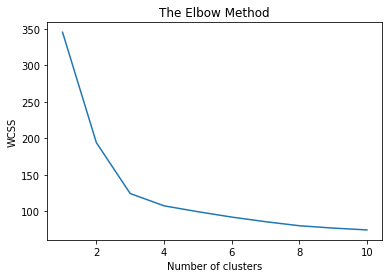

In [12]:
# Строим метод локтя для определения необходимого количества кластеров.
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(df_1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

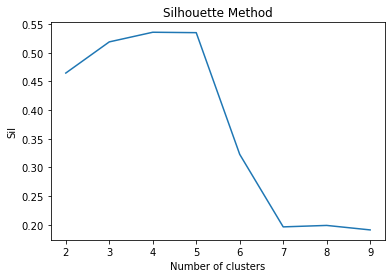

2:0.4644827134998197
3:0.5187784995342309
4:0.5355793998940637
5:0.534841936185618
6:0.3228651023398102
7:0.19651442139736414
8:0.19904762592107775
9:0.1912236665126594


In [13]:
# Используем метод силуэта для определения необходимого количества кластеров. Исходя из полученных данных получаем следующее: оптимальный набор кластеров является число 4 ,близкое к нему значение 5.
from sklearn.metrics import silhouette_score

sil = []

for k in range(2, 10):
  kmeans = KMeans(n_clusters = k).fit(df_1)  
  preds = kmeans.fit_predict(df_1)
  sil.append(silhouette_score(df_1, preds, metric = 'euclidean'))


plt.plot(range(2, 10), sil)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil)):
 print(str(i+2) +":"+ str(sil[i]))

In [14]:
# Применяем алгоритм К-средник для наших данных.
km = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0).fit_predict(df_1)
kms = KMeans(n_clusters = 4, random_state = 0).fit(df_1)
pd.DataFrame(kms.cluster_centers_, columns = ['Age','Sex','ALP','ALT','AST','BIL','CHE','CHOL','CREA','Category']).round()

,Age,Sex,ALP,ALT,AST,BIL,CHE,CHOL,CREA,Category
0,0.0,-0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [15]:
# Выделяем наиболее значимых по нашему мнению переменных, это "Sex", "ALP", "AST", "Category"
X = df_1[:, [1, 2, 4, 9]]

In [16]:
# Применяем алгоритм К-средник для наших отобранных данных.
km = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0).fit_predict(X)
kms = KMeans(n_clusters = 4, random_state = 0).fit(X)
pd.DataFrame(kms.cluster_centers_, columns = ['Sex','ALP','AST','Category']).round()

,Sex,ALP,AST,Category
0,-0.0,1.0,0.0,0.0
1,1.0,1.0,0.0,0.0
2,0.0,0.0,1.0,1.0
3,1.0,0.0,1.0,1.0


In [17]:
import pickle
obj = {'km': km}
output = open('clust-kr.pkl', 'wb')
pickle.dump(obj, output, 4)
output.close()

In [18]:
# Проводим шкалирование данных.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(df_1)
df_1 = sc.transform(df_1)

In [56]:
# Выбираем ранее отобранные нами значимые переменные "Sex", "ALP", "AST", "Category".
X = df_1[:, [1, 2, 4, 9]]

In [34]:
pip install SimpSOM

Note: you may need to restart the kernel to use updated packages.


In [47]:
# Строим базовую сетку размерности 20х30 в течении 4000 итераций.
import SimpSOM as sps
np.random.seed(605891282)
net = sps.somNet(20, 30, X, PBC=True)
net.train(0.01, 4000)
#net.save(‘filename_weights’)

Periodic Boundary Conditions active.
The weights will be initialised randomly.
Training SOM... done!


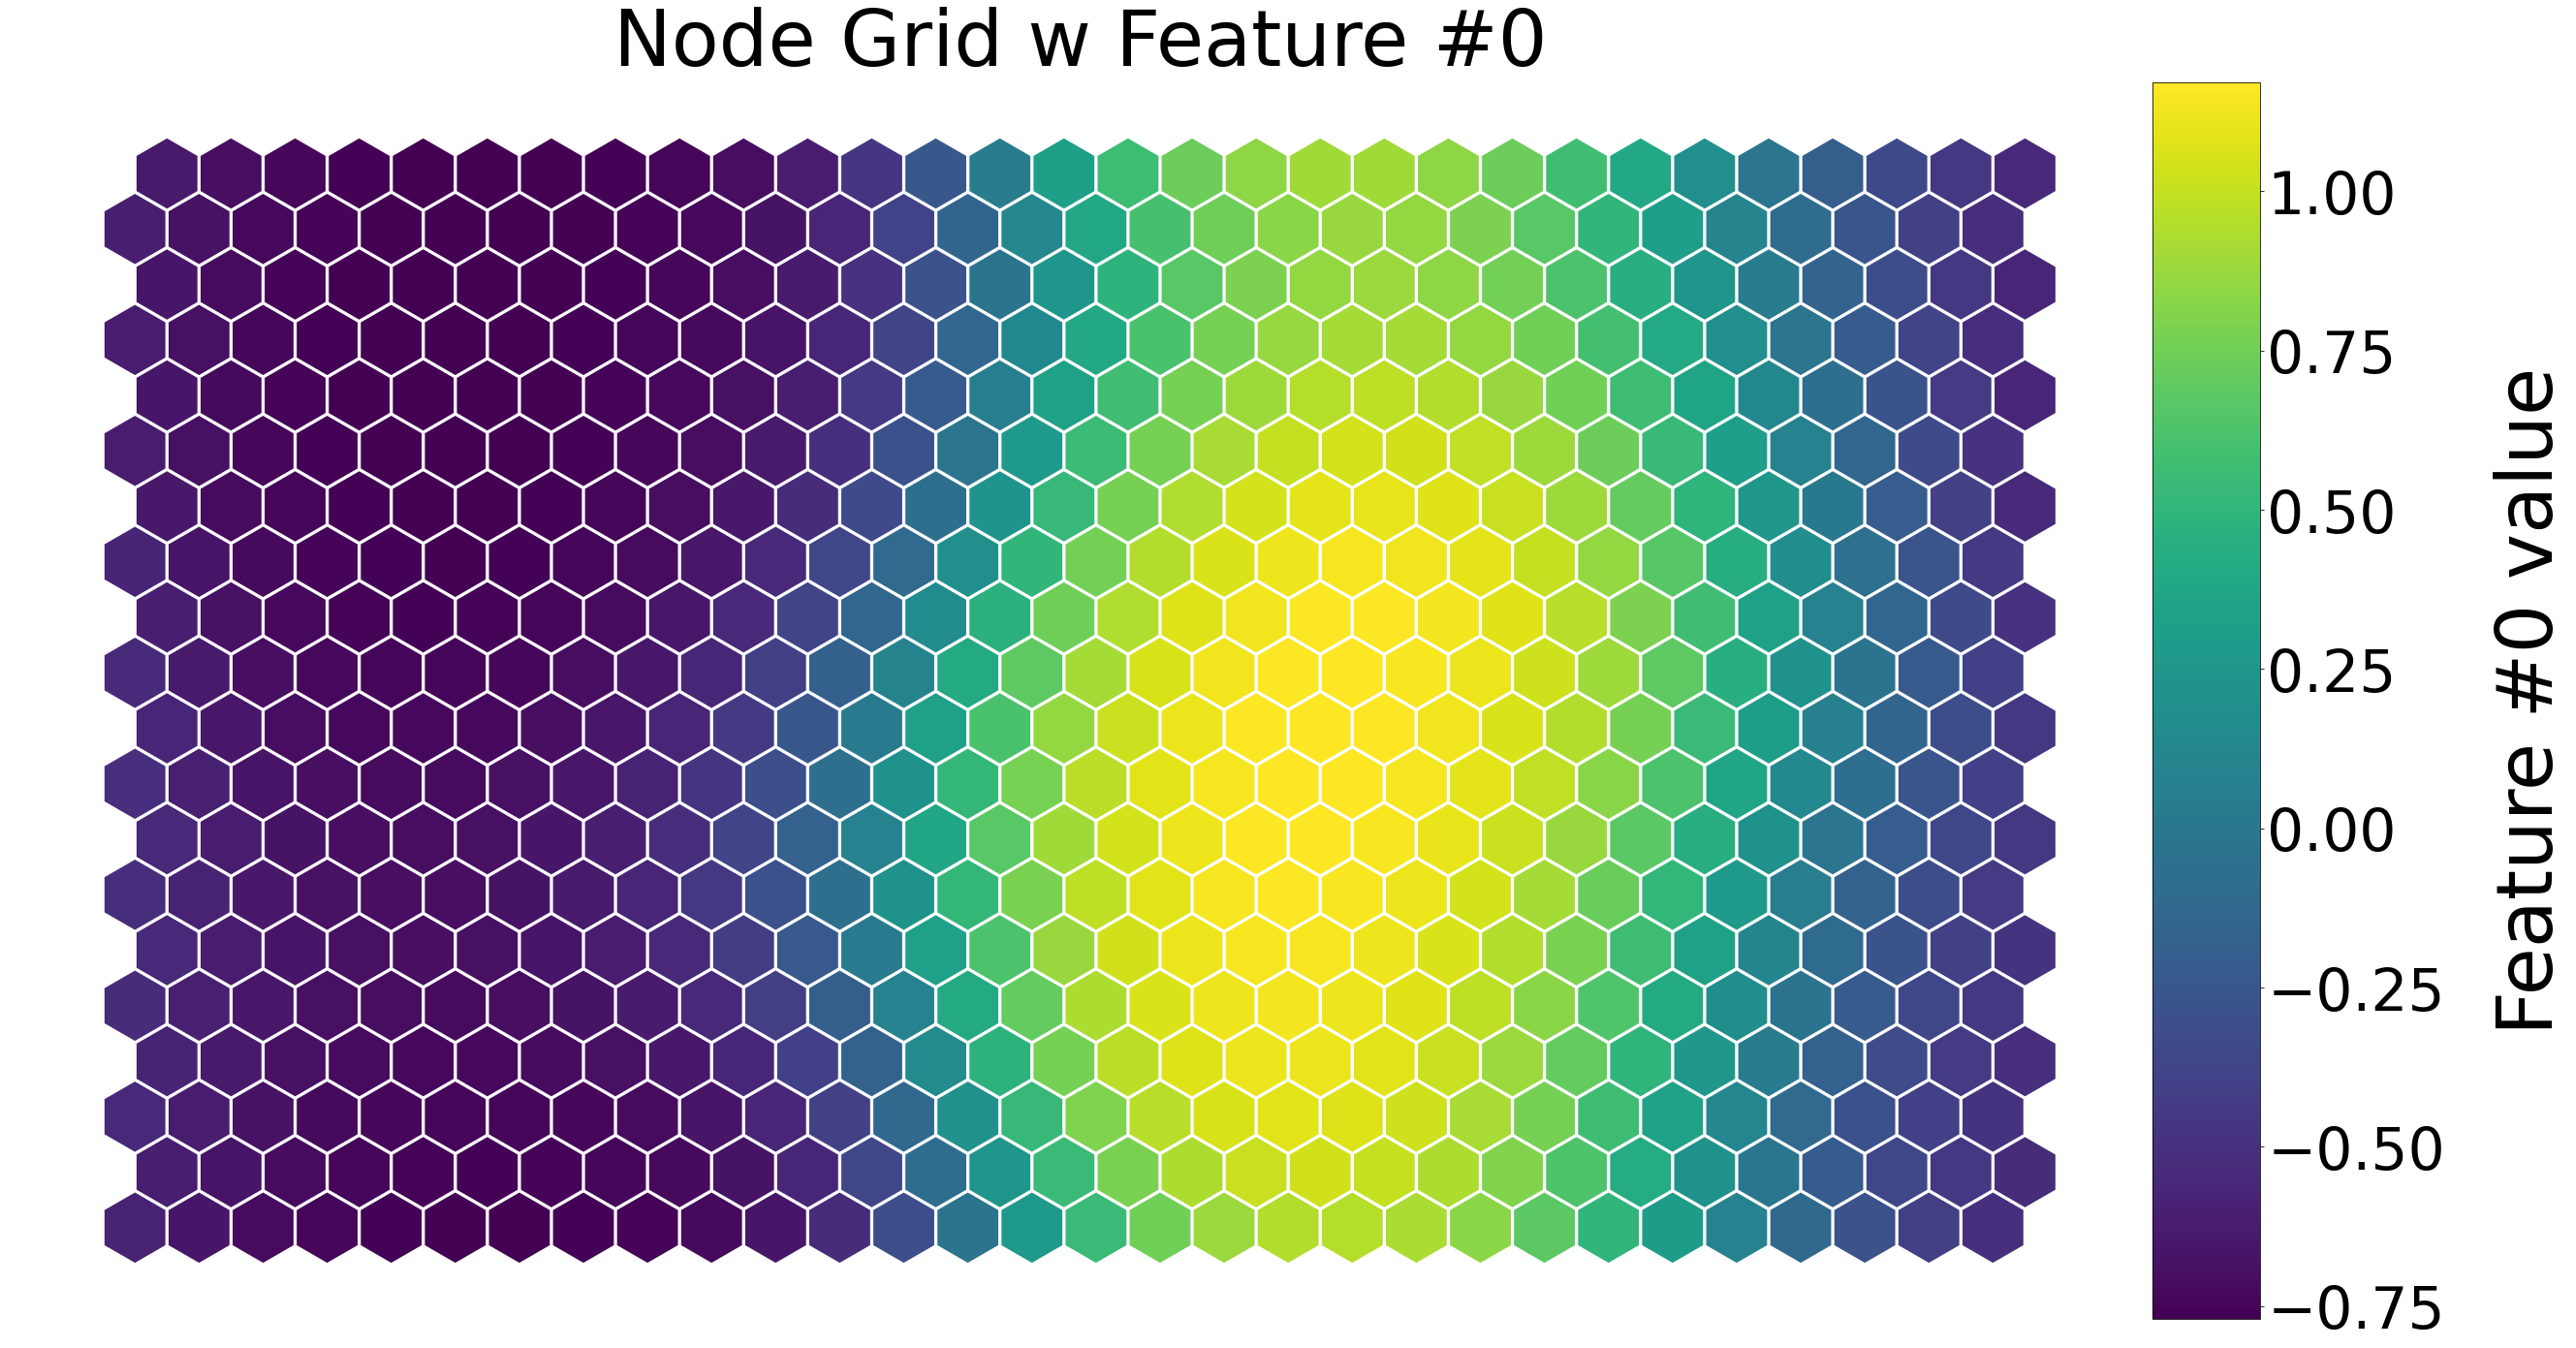

In [48]:
net.nodes_graph(colnum=0)

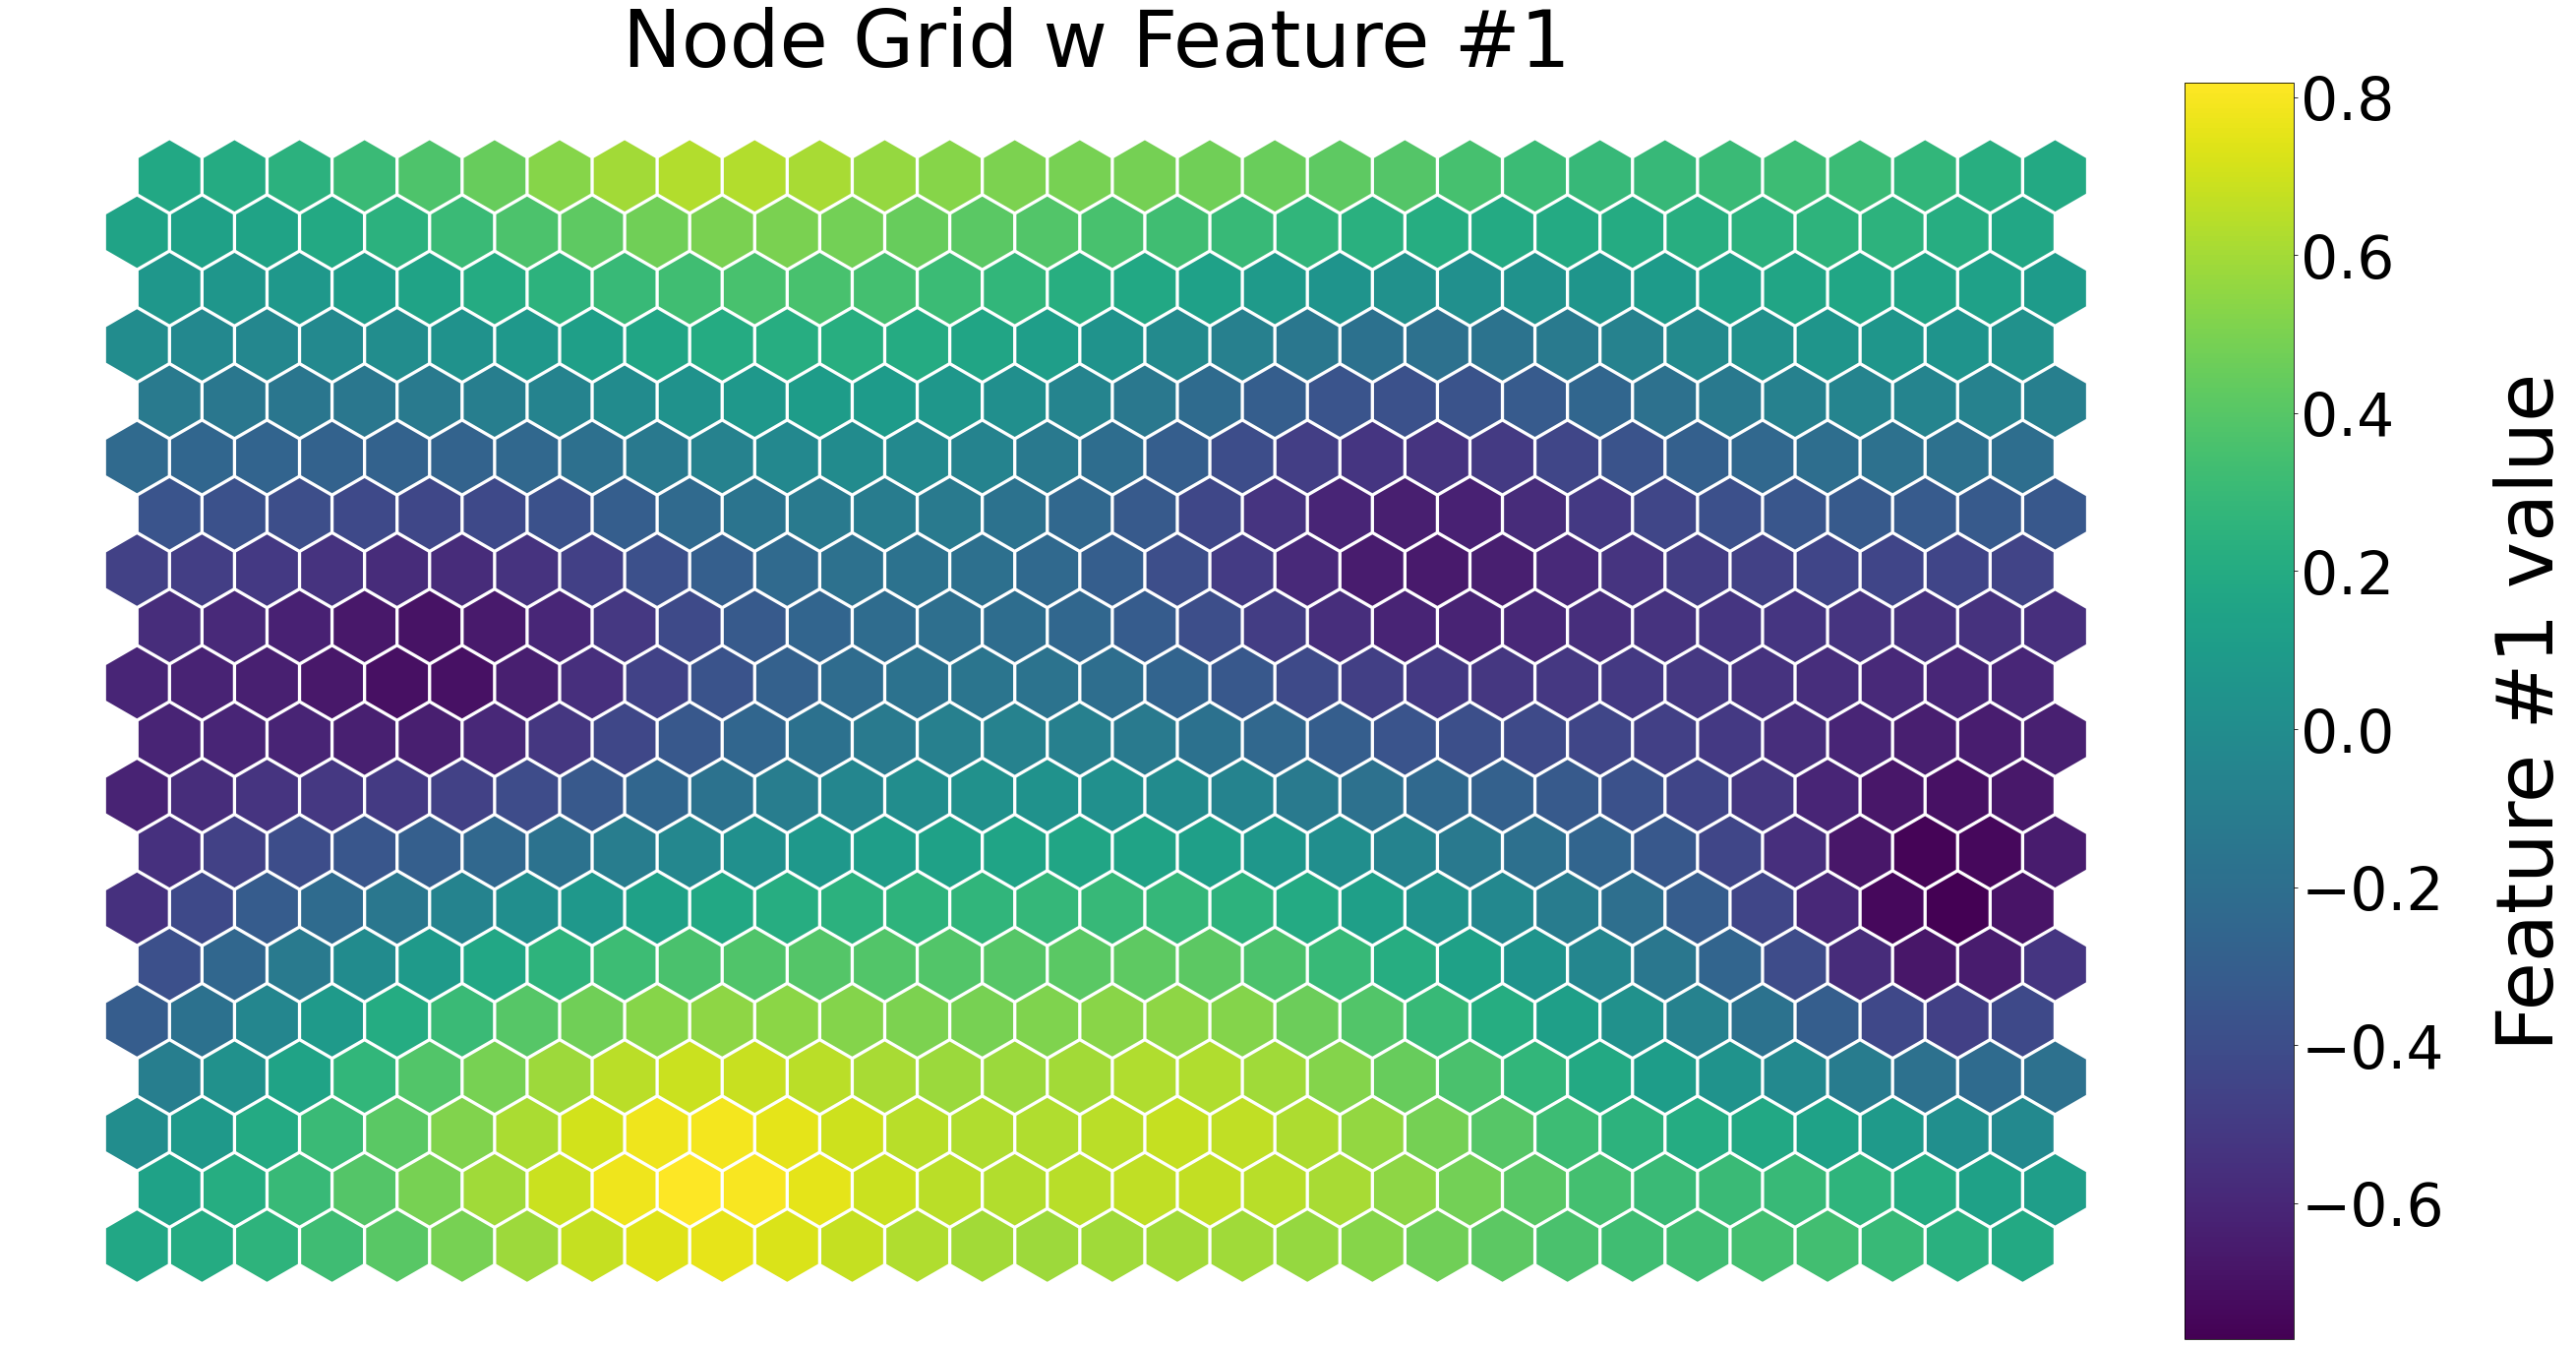

In [49]:
net.nodes_graph(colnum=1)

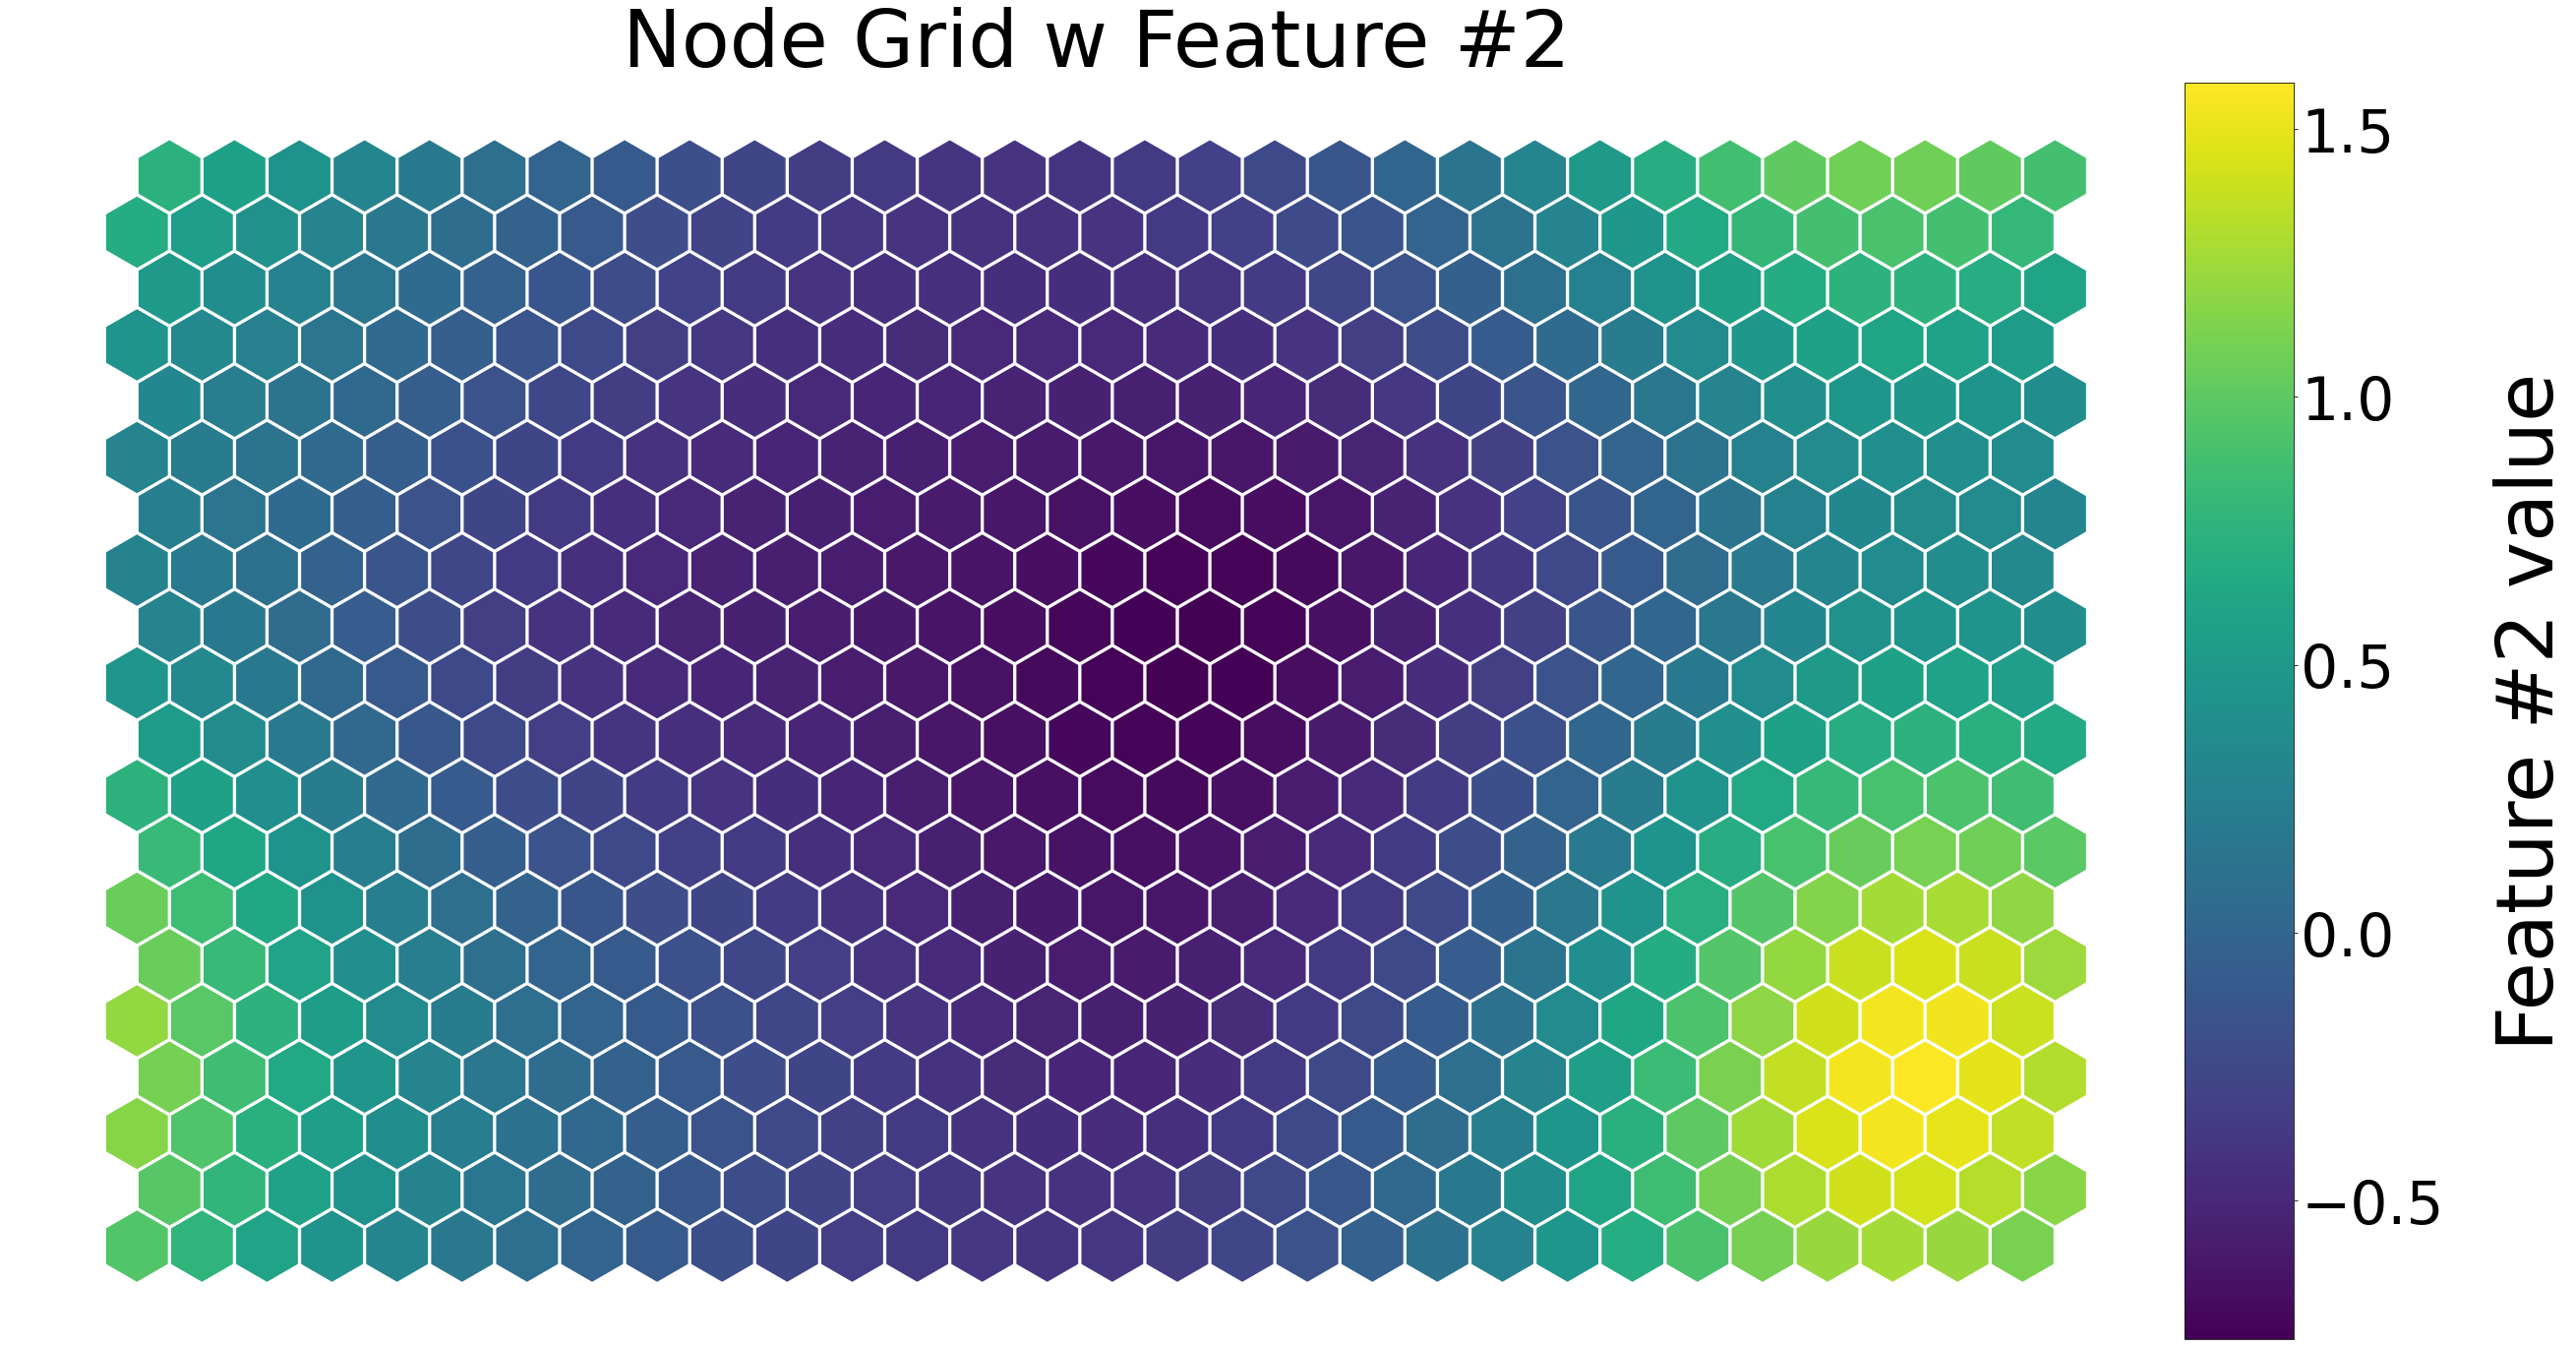

In [50]:
net.nodes_graph(colnum=2)

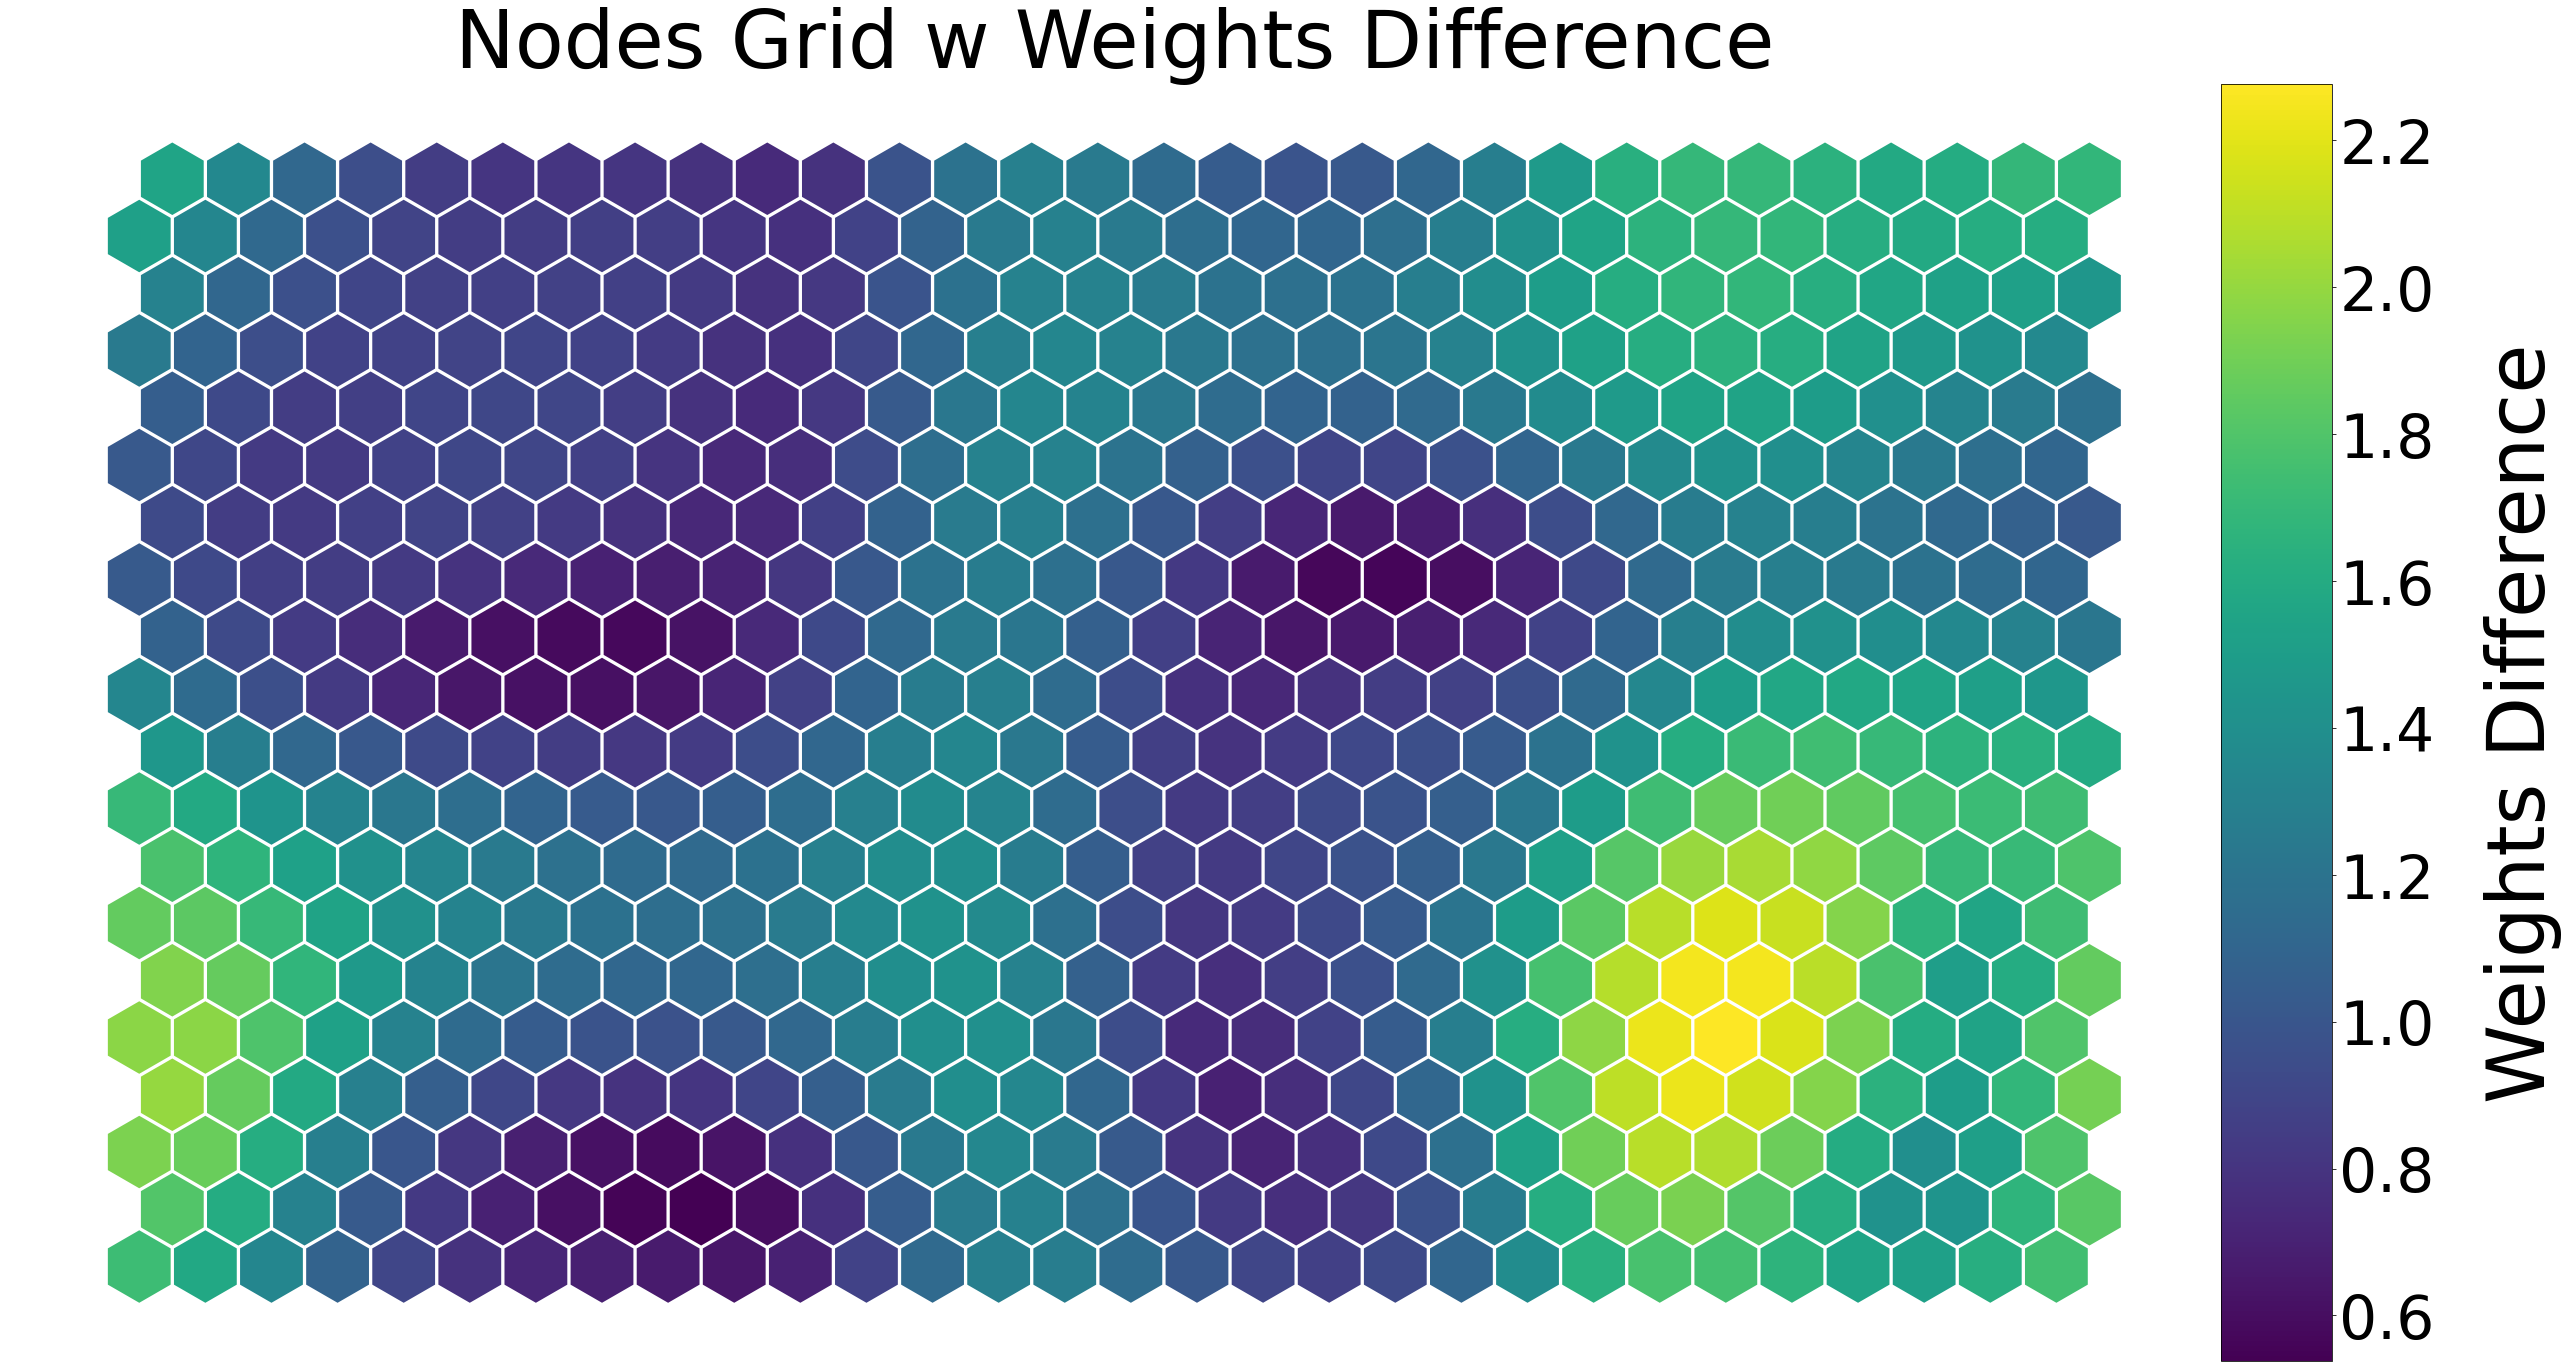

In [51]:
net.diff_graph()

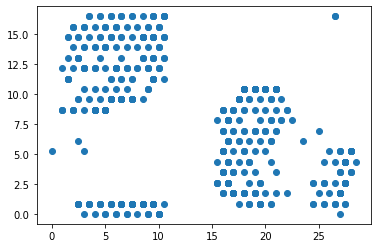

In [52]:
prj=np.array(net.project(X))
plt.scatter(prj.T[0],prj.T[1])
plt.show()

In [53]:
# Применяем к-минс для нашего карты
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(prj)

In [54]:
# Importing km clusters
import pickle
input = open('clust-kr.pkl', 'rb')
obj = pickle.load(input)
input.close()
km = obj["km"]

In [55]:
# Сопоставляем резульаты полученые К-минс с нашей картой. % совпадений составил 73%.
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(km,kmeans.labels_)

0.7313177741456353

In [ ]:
# Полученные выводы. После подготовки наших данных к работе, мы использовали два разных метода для определения количества кластеров , это метод локтя и силуэта. По полученным значнеиям было приянто использовать 4 кластера, хоть и 5 кластеров были близки по значению. После чего отобрали необходимые нам переменные и получили готовые 4 кластера: 1) мужчины с наличием APL и отсутствием AST не склонны к болезни; 2)женщины с наличием APL и отсутствием AST не склонны к болезни; 3)мужчины с отсутствием APL и наличием AST склонны к болезни; 4)женщины с отсутствием APL и наличием AST склонны к болезни. Затем построили карты для визуального определеняи наших кластеров. На карте можно выделить относительно четкие 4 кластера, но так же есть мелкое отделение - это женщины, с наличием APL и AST, склонны к болезни. Конечный итог сопоставления полученных результатов разными методами составил 73% совпадения.   

In [ ]:
# Были проведены различные эксперементы с параметрами карты, однако лучшего результата добиться не удалось и так же принято решение об оптимальном количестве кластеров в размере 4.